# Homework 2 ：八皇后问题

This homework is done by:ZHENG XIAOYANG 202111030007 @ Beijing Normal University

## Part 1: 问题描述

*八皇后问题* 

把8个皇后放在8×8的棋盘上，使其不能互相攻击，即任意两个皇后都不能处于同一行、同一列或同一斜线上。请编写一个程序，输出所有的解。 

要求：采用顺序编码遗传算法；源代码一份，50次运行测试程序效率及准确性；电子版作业报告一份：包含问题描述、编程思路及方法、源代码（添加适当的注释）

该程序使用遗传算法来解决8皇后问题。主要思路如下：

1.*编码方式*：采用顺序编码，每个个体由长度为8的数组表示，数组的每个元素代表皇后在对应列上的行位置。

2.*适应度函数*：计算每个个体的冲突数，冲突越少，适应度越高。

3.*初始化种群*：随机生成一定数量的个体作为初始种群。

4.*选择操作*：根据适应度选择优秀的个体，使用轮盘赌法进行选择。

5.*交叉操作*：以一定的概率对选中的父代进行交叉，产生新的子代。

6.*变异操作*：以一定的概率对新个体进行变异，改变个体的基因，增加种群多样性。

7.*迭代进化*：重复选择、交叉和变异操作，生成新一代种群。

8.*解的判定*：在每一代中检查是否存在满足条件的个体（冲突数为0），如果找到则记录解。
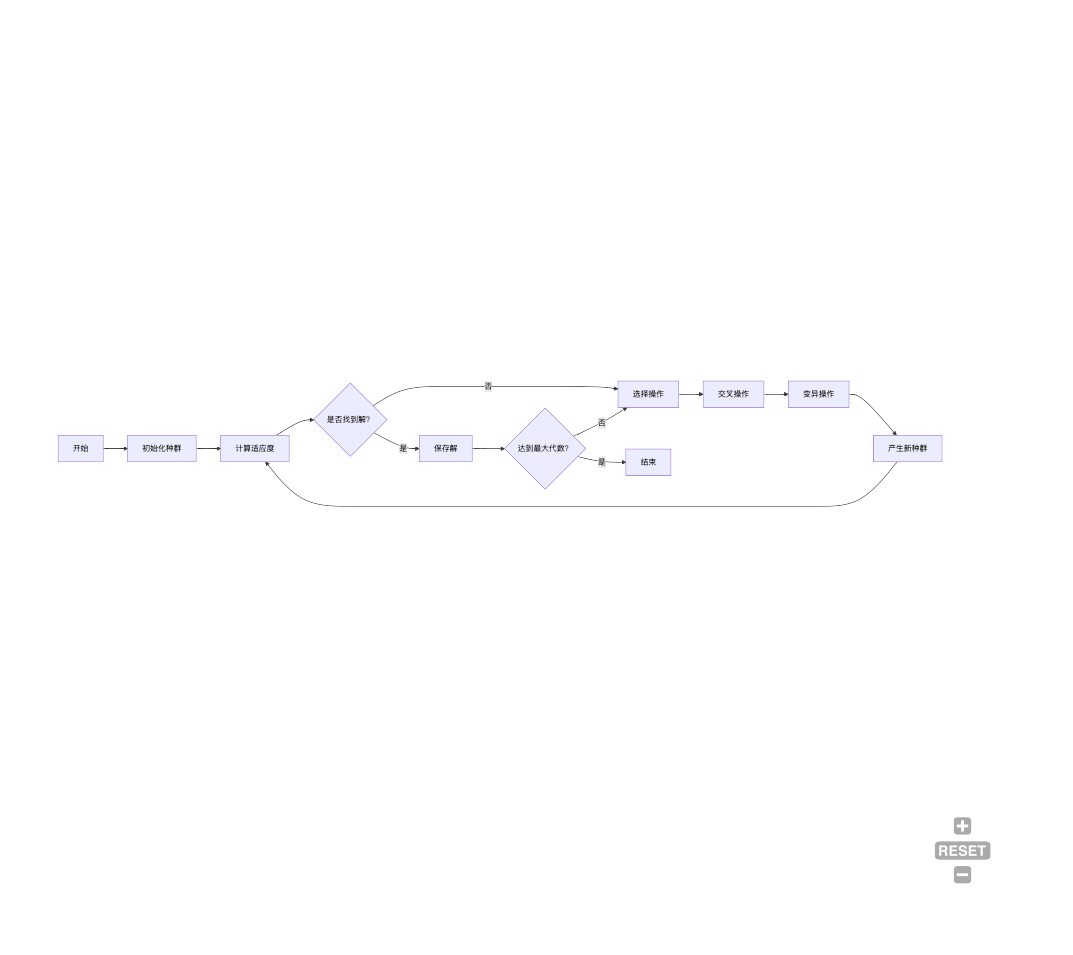

## Part 2 :基本代码实现

### 2.1 导入相关库并初始化优化参数

In [269]:
import random
import multiprocessing
# 参数设置
N = 8  # 皇后数量
POP_SIZE = 500  # 每个种群的规模
MAX_GEN = 5000  # 最大代数
NUM_POPULATIONS = 4  # 并行种群数量
CROSS_RATE = 0.9  # 交叉概率
MUTATION_RATE = 0.3  # 变异概率
ELITE_SIZE = 20  # 精英个体数量

### 2.2 定义相关操作和函数

#### 2.2.1 种群初始化


In [270]:
# 初始化种群
def init_population():
    population = []
    for _ in range(POP_SIZE):
        individual = random.sample(range(N), N)  # 不重复的排列，增加初始多样性
        population.append(individual)
    return population

#### 2.2.2 适应度函数

In [271]:
# 计算适应度函数，冲突越少适应度越高
def fitness(individual):
    conflicts = 0
    for i in range(N):
        for j in range(i + 1, N):
            if abs(individual[i] - individual[j]) == j - i:
                conflicts += 1
    return max_fitness - conflicts

max_fitness = N * (N - 1) // 2  # 最大冲突数为28

#### 2.2.3 选择操作

In [272]:
# 选择操作（锦标赛选择）
def selection(population):
    selected = []
    for _ in range(POP_SIZE):
        ind1 = random.choice(population)
        ind2 = random.choice(population)
        fitter = ind1 if fitness(ind1) > fitness(ind2) else ind2
        selected.append(fitter)
    return selected

#### 2.2.4 交叉操作

In [273]:
# 排序交叉（Order Crossover, OX)
def crossover(parent1, parent2):
    if random.random() < CROSS_RATE:
        point1, point2 = sorted(random.sample(range(N), 2))
        child = [None]*N
        child[point1:point2+1] = parent1[point1:point2+1]
        ptr = 0
        for i in range(N):
            if parent2[i] not in child:
                while child[ptr] is not None:
                    ptr +=1
                child[ptr] = parent2[i]
        return child
    else:
        return parent1[:]

#### 2.2.5 变异操作

In [274]:
# 变异操作（逆序变异）
def mutation(individual):
    if random.random() < MUTATION_RATE:
        point1, point2 = sorted(random.sample(range(N), 2))
        individual[point1:point2+1] = reversed(individual[point1:point2+1])
    return individual

#### 2.2.6 进化操作

In [275]:
# 检查是否为正确解
def is_valid(individual):
    return fitness(individual) == max_fitness

### 2.3 主程序

In [282]:
# 主函数
def genetic_algorithm(printif = True):
    population = init_population()
    solutions = []
    gen = 0
    number = 0
    while gen < MAX_GEN:
        gen += 1
        # 计算种群适应度
        population_fitness = [(individual, fitness(individual)) for individual in population]
        population_fitness.sort(key=lambda x: x[1], reverse=True)
        # 精英保留
        elites = [individual for individual, fit in population_fitness[:ELITE_SIZE]]

        # 检查是否有新解
        for individual, fit in population_fitness:
            if fit == max_fitness and individual not in solutions:
                solutions.append(individual)
                #print(f"在第 {gen} 代找到新解：{individual}")
                # 如果找到所有92个解，提前退出
                if len(solutions) >= 92:
                    if printif:
                        print("\n已找到所有可能的解。")
                    gen = MAX_GEN
                    break

        # 选择
        selected = selection(population)
        # 生成新种群
        new_population = elites.copy()
        while len(new_population) < POP_SIZE:
            parent1 = random.choice(selected)
            parent2 = random.choice(selected)
            child = crossover(parent1, parent2)
            child = mutation(child)
            new_population.append(child)
        population = new_population

    # 输出所有解
    unique_solutions = []
    for solution in solutions:
        if solution not in unique_solutions:
            unique_solutions.append(solution)
            number += 1

    if printif:
        print(f"\n共找到 {len(unique_solutions)} 个独特的解：")
        for solution in unique_solutions:
            print(solution)
    return number

if __name__ == "__main__":
    print(genetic_algorithm(False))

92


### Part 3 :测试程序效率及准确性

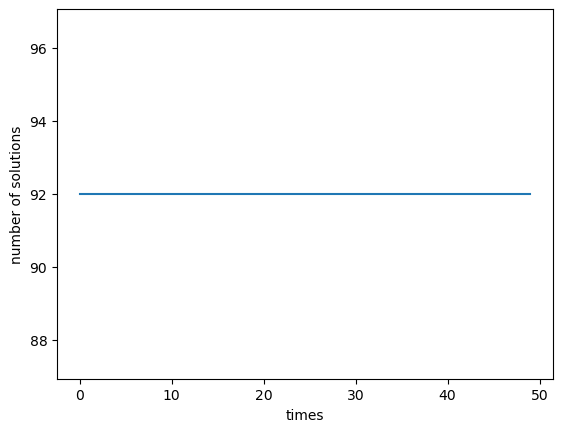

In [283]:
import matplotlib.pyplot as plt
result = []
for i in range(1, 51):
    result.append(genetic_algorithm(False))
plt.plot(result)
plt.xlabel('times')
plt.ylabel('number of solutions')
plt.show()